# Desafio Ciência de Dados - Dhauz

## Candidato : Humberto Sousa Martins

### Começamos definindo um tema escuro para o notebook para reduzir o esforço visual. Instalamos as bibliotecas relevantes e as importamos.

In [1]:
# Configura o jupyter notebook no tema escuro, de melhor visualização.
!pip install jupyterthemes -q
!jt -t oceans16 -fs 120 -tfs 12 -nfs 120 -ofs 120 -dfs 120 -cellw 90%

# Atualize a página para aplicar o tema
# Caso usando Colab ou outra ferramente , ignore o código

In [2]:
!pip install pandas -q
!pip install numpy -q
!pip install matplotlib -q
!pip install seaborn -q
!pip install sklearn -q
!pip install tensorflow -q

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Importamos os dados e passamos um arguimento para exibir todas as colunas

In [572]:
data = pd.read_csv('cancellation_prediction.csv')     # Importa os dados
pd.options.display.max_columns = None                 # Exibe todas as colunas da tabela

### A segiur fazemos uma exploração inicial da tabela, para nos familiarizar com os dados
O primeiro objetivo será analisar os dados, se as classes estão balanceadas, quais os tipos de variáveis e se há variáveis faltantes

In [573]:
data.head(10) # Lista as primeiras 10 linhas

,type,cancellation,days_between_booking_arrival,year_arrival_date,month_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,num_children,num_babies,breakfast,country,market_segment,distribution_channel,repeated_guest,num_previous_cancellations,num_previous_stays,reserved_room,changes_between_booking_arrival,deposit_policy,id_travel_agency_booking,id_person_booking,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests
0,Fancy Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,True,PRT,0,0,0,0,0,C,3,No Deposit,NaN,NaN,0,0.0,0,0
1,Fancy Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,True,PRT,0,0,0,0,0,C,4,No Deposit,NaN,NaN,0,0.0,0,0
2,Fancy Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,True,GBR,0,0,0,0,0,A,0,No Deposit,NaN,NaN,0,75.0,0,0
3,Fancy Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,True,GBR,1,1,0,0,0,A,0,No Deposit,304.0,NaN,0,75.0,0,0
4,Fancy Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,True,GBR,2,2,0,0,0,A,0,No Deposit,240.0,NaN,0,98.0,0,1
5,Fancy Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,True,GBR,2,2,0,0,0,A,0,No Deposit,240.0,NaN,0,98.0,0,1
6,Fancy Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,True,PRT,0,0,0,0,0,C,0,No Deposit,NaN,NaN,0,107.0,0,0
7,Fancy Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,False,PRT,0,0,0,0,0,C,0,No Deposit,303.0,NaN,0,103.0,0,1
8,Fancy Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,True,PRT,2,2,0,0,0,A,0,No Deposit,240.0,NaN,0,82.0,0,1
9,Fancy Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,False,PRT,3,2,0,0,0,D,0,No Deposit,15.0,NaN,0,105.5,0,0


### Lidando com NaN's, variáveis categóricas e balanço de classes
Criamos uma tabela de referência, que mostra o tipo de variável interpretada do arquivo csv, e quantos valores nulos ou NaN existem por coluna
Teremos que fazer algumas **suposições razoáveis** sobre algumas variáveis categóricas, que poderiam ser futuramente confirmadas com acesso à documentação adequada ou conversando com o responsável pela coleta

In [590]:
def make_resume(data):  #Função para criar uma tabela de resumo
    # Cria a tabela de referencia
    tabela_referencia = pd.DataFrame(data=(data.dtypes.keys(),data.dtypes.values,data.isna().sum()),index=('nome_var','tipo_var','num_Nan')).transpose()

    # Mostra valores unicos de cada coluna
    tabela_referencia[['unique_values','balance']] = 'dummy_value'   # cria coluns com uma variável dummy
    for i,col in enumerate(data.columns):
        tabela_referencia['unique_values'].iloc[i] = ' , '.join(data[col].value_counts(normalize=True).keys().astype(str))       # Ordena os valores e retorna a classe
        tabela_referencia['balance'].iloc[i] = ' , '.join(data[col].value_counts(normalize=True).round(2).values.astype(str))    # Retorna a proporção de cada classe na mesma ordem
        
    return tabela_referencia

resumo = make_resume(data)
resumo

,nome_var,tipo_var,num_Nan,unique_values,balance
0,type,object,0,"Hotel , Fancy Hotel","0.66 , 0.34"
1,cancellation,int64,0,"0 , 1","0.63 , 0.37"
2,days_between_booking_arrival,int64,0,"0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 12 , 11 , ...","0.05 , 0.03 , 0.02 , 0.02 , 0.01 , 0.01 , 0.01..."
3,year_arrival_date,int64,0,"2016 , 2017 , 2015","0.47 , 0.34 , 0.18"
4,month_arrival_date,object,0,"August , July , May , October , April , June ,...","0.12 , 0.11 , 0.1 , 0.09 , 0.09 , 0.09 , 0.09 ..."
5,week_number_arrival_date,int64,0,"33 , 30 , 32 , 34 , 18 , 21 , 28 , 17 , 20 , 2...","0.03 , 0.03 , 0.03 , 0.03 , 0.02 , 0.02 , 0.02..."
6,day_of_month_arrival_date,int64,0,"17 , 5 , 15 , 25 , 26 , 9 , 12 , 16 , 2 , 19 ,...","0.04 , 0.04 , 0.04 , 0.03 , 0.03 , 0.03 , 0.03..."
7,num_weekend_nights,int64,0,"0 , 2 , 1 , 4 , 3 , 6 , 5 , 8 , 7 , 9 , 10 , 1...","0.44 , 0.28 , 0.26 , 0.02 , 0.01 , 0.0 , 0.0 ,..."
8,num_workweek_nights,int64,0,"2 , 1 , 3 , 5 , 4 , 0 , 6 , 10 , 7 , 8 , 9 , 1...","0.28 , 0.25 , 0.19 , 0.09 , 0.08 , 0.06 , 0.01..."
9,num_adults,int64,0,"2 , 1 , 3 , 0 , 4 , 26 , 27 , 20 , 5 , 40 , 50...","0.75 , 0.19 , 0.05 , 0.0 , 0.0 , 0.0 , 0.0 , 0..."


Podemos observar que temos colunas categóricas e ordinais, colunas com valores NaN e desbalanço de classes em variáveis relevantes para o estudo (ex cancellation e 	year_arrival_date). A seção a seguir padroniza as classes e limpa os valores NaN. O desbalanço de classes foi considerado dentro do aceitável para, em primeira aproximação, não requerer algum procedimento para balanceamento 


### Converter variáveis categóricas em integrais

In [592]:
type_dict = {'Fancy Hotel':1,'Hotel':0}      # Cria um dict de categorias str para int
data.type = data.type.map(type_dict)         # Aplica o dict

month_dict = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
data.month_arrival_date = data.month_arrival_date.map(month_dict)

# Aqui estou supondo que cada letra corresponde a um tipo de acomodação, talvez variando pelo numero de camas ou qualidade, por exemplo 'suíte' ou 'quarto dividido'
room_dict = {'A':0 ,'B':1 ,'C':2 ,'D':3 ,'E':4 ,'F':5 ,'G':6 ,'H':7 ,'L':8 ,'P':9}
data.reserved_room = data.reserved_room.map(room_dict)

deposit_dict = {'No Deposit':0, 'Non Refund':1, 'Refundable':2}
data.deposit_policy = data.	deposit_policy.map(deposit_dict)

# O método de usar dicionários foi útil para controlar como queria mapear, mas para o caso da coluna country que tem centenas de categorias,
#  usarei funções do Pandas para fazer isso de maneira automática
data.country = data.country.astype('category').cat.codes

### Lidando com NaN

In [593]:
# No caso da coluna num_children os valores NaN serão substituídos pelo numero médio de crianças por reserva
data.num_children.fillna(data.num_children.mean(),inplace=True)

# Os campos id_travel_agency_booking e id_person_booking tem muitos valores NaN, e pela análise da matriz de correlação a baixo, mostraram ter baixa correlação
# com a variável cancellation , e em uma primeira aproximação podem ser excluídos da análise
data.drop(['id_travel_agency_booking','id_person_booking'],axis=1, inplace=True)

In [594]:
# Refazemos a tabela resumo e conferimos que os dados estão limpos
resumo = make_resume(data)
resumo

,nome_var,tipo_var,num_Nan,unique_values,balance
0,type,int64,0,"0 , 1","0.66 , 0.34"
1,cancellation,int64,0,"0 , 1","0.63 , 0.37"
2,days_between_booking_arrival,int64,0,"0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 12 , 11 , ...","0.05 , 0.03 , 0.02 , 0.02 , 0.01 , 0.01 , 0.01..."
3,year_arrival_date,int64,0,"2016 , 2017 , 2015","0.47 , 0.34 , 0.18"
4,month_arrival_date,int64,0,"8 , 7 , 5 , 10 , 4 , 6 , 9 , 3 , 2 , 11 , 12 , 1","0.12 , 0.11 , 0.1 , 0.09 , 0.09 , 0.09 , 0.09 ..."
5,week_number_arrival_date,int64,0,"33 , 30 , 32 , 34 , 18 , 21 , 28 , 17 , 20 , 2...","0.03 , 0.03 , 0.03 , 0.03 , 0.02 , 0.02 , 0.02..."
6,day_of_month_arrival_date,int64,0,"17 , 5 , 15 , 25 , 26 , 9 , 12 , 16 , 2 , 19 ,...","0.04 , 0.04 , 0.04 , 0.03 , 0.03 , 0.03 , 0.03..."
7,num_weekend_nights,int64,0,"0 , 2 , 1 , 4 , 3 , 6 , 5 , 8 , 7 , 9 , 10 , 1...","0.44 , 0.28 , 0.26 , 0.02 , 0.01 , 0.0 , 0.0 ,..."
8,num_workweek_nights,int64,0,"2 , 1 , 3 , 5 , 4 , 0 , 6 , 10 , 7 , 8 , 9 , 1...","0.28 , 0.25 , 0.19 , 0.09 , 0.08 , 0.06 , 0.01..."
9,num_adults,int64,0,"2 , 1 , 3 , 0 , 4 , 26 , 27 , 20 , 5 , 40 , 50...","0.75 , 0.19 , 0.05 , 0.0 , 0.0 , 0.0 , 0.0 , 0..."


### Primeira análise: Matriz de correlação
Indica quais variáveis são imediatamente relevantes para análise do problema

<AxesSubplot:>

Text(0.5, 1.0, 'Matriz de Correlação')

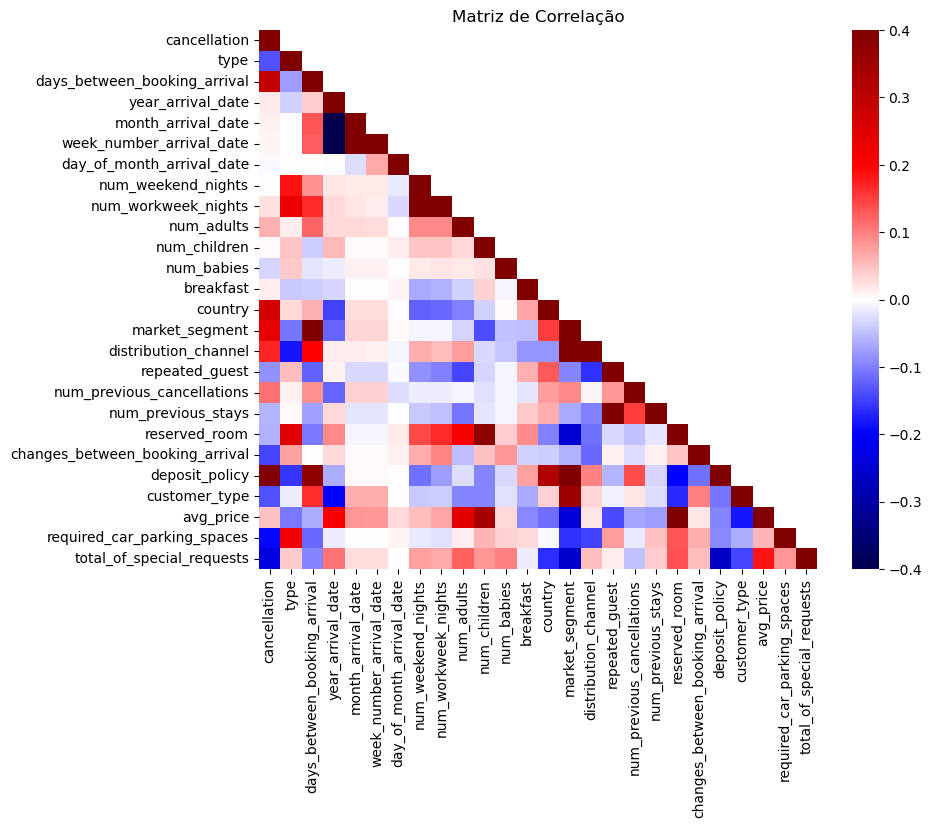

In [226]:
data.insert(0, "cancellation", data.pop("cancellation"))                                             # Move a variável cancellation para a primeira coluna
corr_matrix = data.corr()                                                                            # Cria a matriz de correlação
fig, ax = plt.subplots(1,1,figsize=(9,7), dpi=100)                                                   # Define parâmetros de plotagem
mask = np.triu(np.ones_like(corr_matrix, dtype=bool),k=1)                                            # Cria uma máscara para excluir a metade superior
sns.heatmap(corr_matrix, annot=False , mask=mask , cmap='seismic', vmax=0.4, vmin=-0.4, center=0)    # Plota com o pacote seaborn
ax.set_title("Matriz de Correlação")
plt.savefig('corr_matrix.png', dpi=150)
plt.show()

### Para visualizar de maneira mais clara as correlações cojm a variável cancellation, podemos gerar um gráfico de barras
As linhas das variáveis categóricas (por ex: country ou deposit_policy) deve ser interpretada com cuidado, por se tratar de uma variável categórica convertida para um valor inteiro de maneira arbitrária

<BarContainer object of 25 artists>

[Text(0.5, 0, 'Correlação'),
 Text(0.5, 1.0, 'Correlações da variável cancellation')]

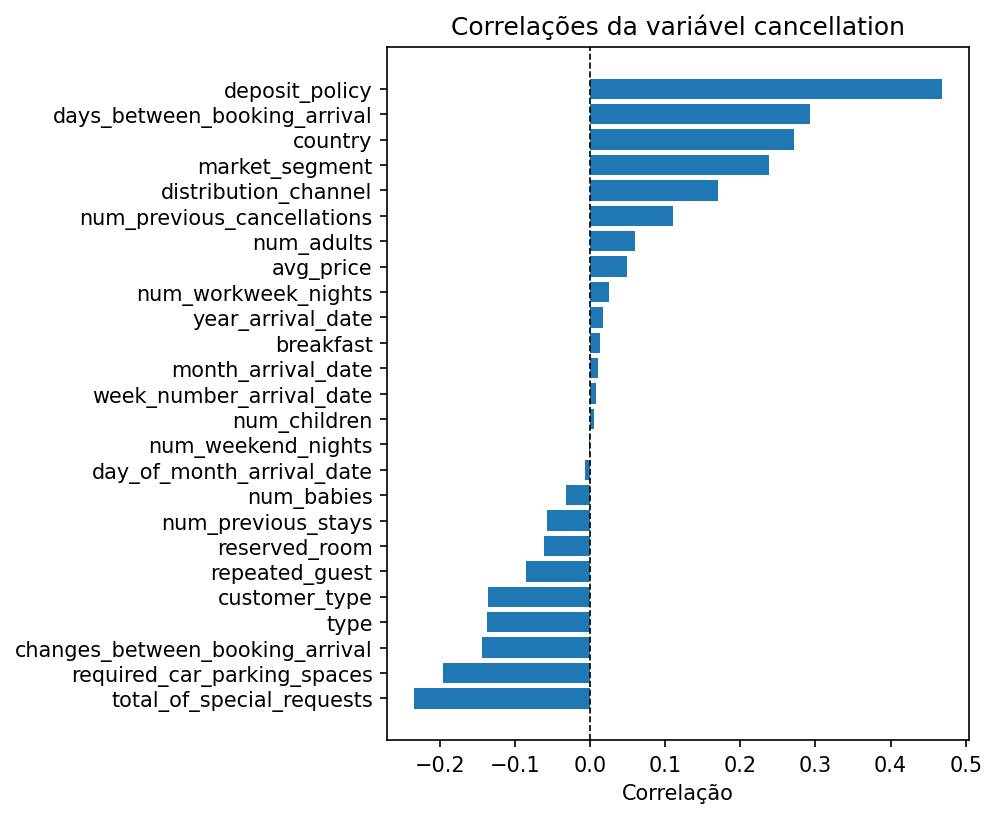

In [595]:
canc_corr = corr_matrix.iloc[1:,0].sort_values(ascending=False)      # Seleciona todas as colunas da matrix correlação na variavel cancellation e as ordena
fig, ax = plt.subplots(1,1,figsize=(5,6), dpi=150)
ax.barh(canc_corr.keys(),canc_corr.values, align='center')          # Define parâmetros de plotagem e plota o gráfico
ax.invert_yaxis()
ax.axvline(0,c='k',lw=0.8,ls='--')
ax.set(xlabel='Correlação',title='Correlações da variável cancellation')
plt.savefig("canc_corr.png",dpi=150)
plt.show()

## Variáveis de interesse: *days_between_booking_arrival* , *year_arrival_date*
days_between_booking_arrival: Escolhida po ser numérica, autoexplicativa e com correlação maior que 0.10

year_arrival_date: Desejamos saber se o ano da reserva influenciou no balanço da variável cancellation

Outras variáveis que parecem interessantes são *market_segment*, *distribution_channel*, que apresentam correlação com *cancellation* maior que 0.10, assim como *customer_type*, *changes_between_booking_arrival* , apresentando uma correlação inversa superior a -0.10. Porém seria necessário acesso à documentação do dataset com descrição do quê essas classes numéricas significam para uma abordagem precisa do impacto destas variáveis no problema.

<AxesSubplot:xlabel='days_between_booking_arrival', ylabel='Count'>

<AxesSubplot:xlabel='days_between_booking_arrival', ylabel='Count'>

[Text(0.5, 1.0, 'Cancelamentos absolutos por dia para reserva'),
 Text(0, 0.5, 'Contagem'),
 Text(0.5, 0, 'Dias para reserva')]

[Text(0.5, 1.0, 'Cancelamentos proporcionais por dia para reserva'),
 Text(0, 0.5, 'Razão'),
 Text(0.5, 0, 'Dias para reserva')]

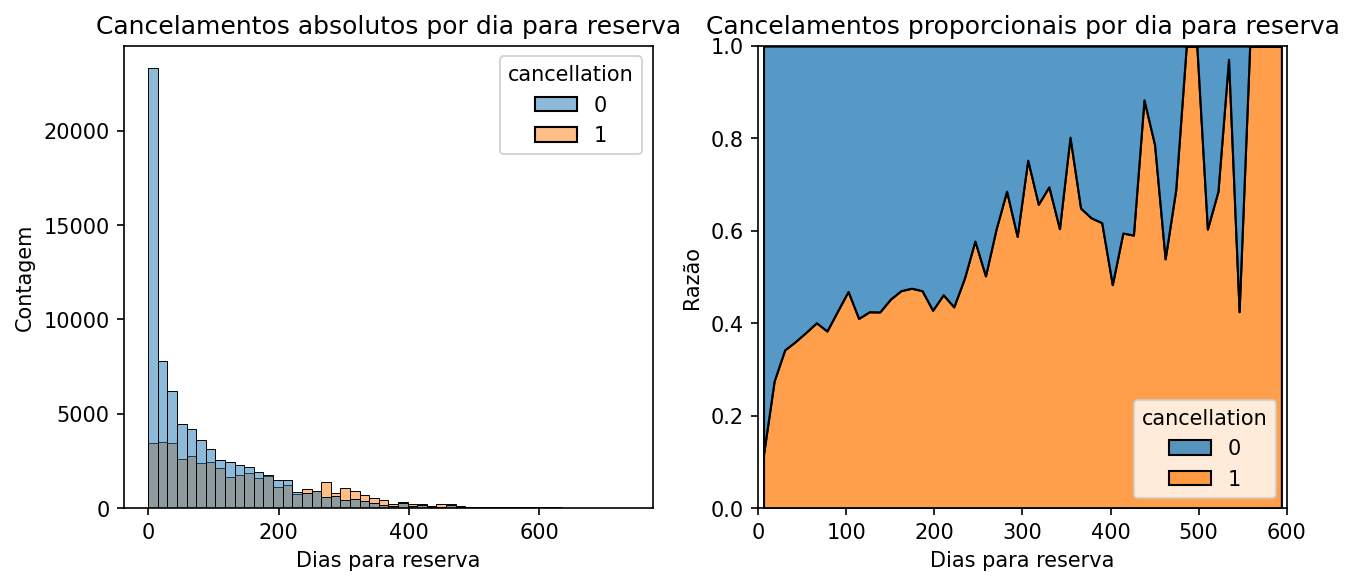

In [671]:
# Plota gráficos de cancelamentos em relação aos dias de reserva. A esquerda a contagem absoluta, e à direita a contagem relativa
fig, ax = plt.subplots(1,2,figsize=(10,4), dpi=150)
sns.histplot(data=data,ax=ax[0],x='days_between_booking_arrival',hue='cancellation',stat='count',bins=50)
sns.histplot(data=data,ax=ax[1],x='days_between_booking_arrival',hue='cancellation',stat='count',bins=50,element='poly',multiple='fill',binrange=(0,600))
sns.move_legend(ax[1], "lower right")
ax[0].set(title='Cancelamentos absolutos por dia para reserva', ylabel='Contagem',xlabel='Dias para reserva')
ax[1].set(title='Cancelamentos proporcionais por dia para reserva', ylabel='Razão',xlabel='Dias para reserva')
plt.savefig('canc_by_reservation_days')


Observamos pelo gráfico gerado que a porcentagem de cancelamentos aumenta proporcionalmente aos dias de reserva, algo que faz sentido do ponto de vista de lógico e de negócio. A primeira conclusão é que a proporção de cancelamentos sobe drasticamente para reservas para mais de 30 dias , em relação à reservas para menos tempo

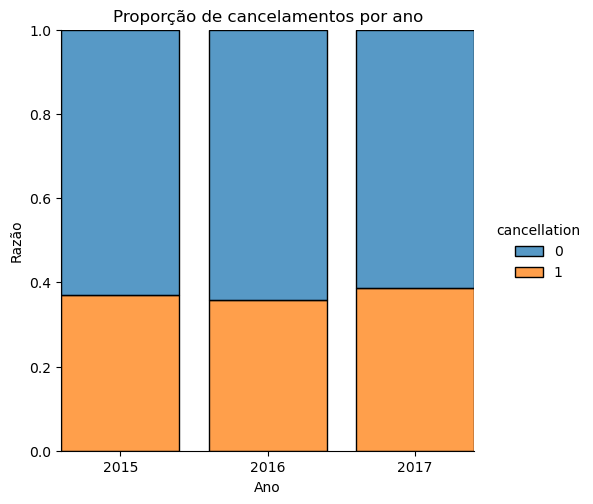

In [643]:
# Plota gráfico da razão de cancelamentos por ano
ax = sns.displot(data, x='year_arrival_date', hue='cancellation', multiple='fill',kind='hist',bins=3,shrink=.8,discrete=True)
ax.set(xticks=[2015,2016,2017],title = 'Proporção de cancelamentos por ano', ylabel='Razão', xlabel='Ano')
plt.show()


Nota-se que a proporção de cancelamentos permanece similar ao longo dos anos, em um primeiro momento podemos supor que esta variável não influencia de maneira relevante a variável cancellations

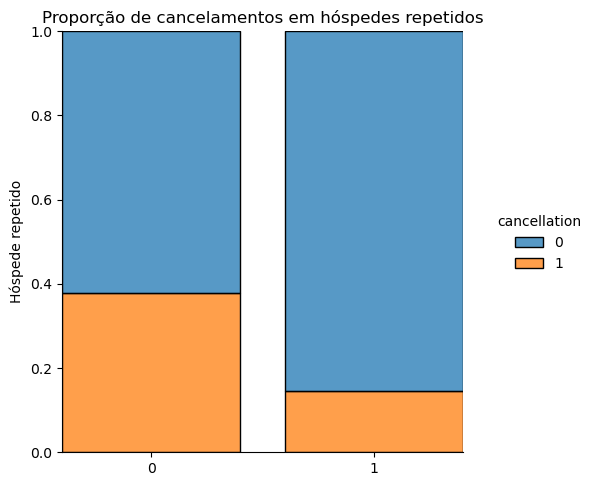

In [672]:
# Plota gráfico da razão de cancelamentos por ano
data_extra = pd.read_csv('cancellation_prediction.csv') 
ax = sns.displot(data_extra, x='repeated_guest', hue='cancellation', multiple='fill',kind='hist',shrink=.8,discrete=True)
ax.set(xticks=[0,1],title = 'Proporção de cancelamentos em hóspedes repetidos', ylabel='Hóspede repetido', xlabel='')
plt.show()

Hóspedes que já reservaram antes tem quase 20% menores chances de cancelar a reserva

## Criando o modelo preditivo
Criaremos a seguir dois modelos preditivos, uma *decision tree* e uma *deep neural network*, e também um modelo de *random guess* que servirá de *baseline* para os modelos preditivos. Em ambos os casos, os modelos são aproximações iniciais, mas dão um resultado satisfatório de maneira simples. Para um refinamento do modelo *decision tree* poderia ser utilizada a técnica de *ensemble*, usando modelos mais sofisticados como XGBoost ou RandonForrests. Já para a rede neural, poderia ser aplicada uma camada de *embedding* nas variáveis categóricas.

In [425]:
# Importamos as bibliotecas
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit , cross_val_score , cross_val_predict ,train_test_split
from sklearn.metrics import accuracy_score

from keras.layers import Dense, Dropout, Flatten ,Conv2D, MaxPooling2D, Input
from keras.models import Model , Sequential


### Definindo o modelo de *random guess*
O objetivo deste modelo é apresentar para o cliente a métrica pela qual os modelos serão avaliados (acurácia) e provar que os modelos tem um desempenho melhor que um 'chute aleatório'.

A acurácia é definida pelo número de acertos sob o total de exemplos

$$ \Large \frac{\sum^n (y_{previsto} == y_{esperado})}{n} $$

In [516]:
# Usaremos a proporção entre cancelamentos e não-cancelamentos para um resultado mais razoável
# Obtendo a proporção
contagem_canc = data.cancellation.value_counts(normalize=True)                                          # Conta os valores e normaliza
print(f'Não cancelaram {contagem_canc[0]*100:.2f}%\nCancelaram {contagem_canc[1]*100:.2f}%\n')
rng = np.random.default_rng(55446)                                                                      # Inicializa o RNG
random_set = np.random.choice((0,1),p=(contagem_canc[0],contagem_canc[1]),size=len(data))               # Gera o array aleatório
random_set_series = pd.DataFrame(random_set)                                                            # Tansforma o array em série do pandas

print(f'Acurácia do modelo aleatório = {accuracy_score(data.cancellation,random_set_series)*100:.2f}%') # Calcula a acurácia e exibe na tela


Não cancelaram 62.96%
Cancelaram 37.04%

Acurácia do modelo aleatório = 53.25%


Observamos o que era esperado, uma acurácia por volta de 50%, pequenas diferenças são causadas pelo inicializador de RNG

### Modelo *decision tree*


In [521]:
# Preparamos os dados , separando a variável de interesse cancellation como o conjunto y
X = data.drop('cancellation',axis=1)
y = data['cancellation']

# Define o modelo nas configurações padrão
clf = DecisionTreeClassifier(random_state=42 , min_samples_split=.05 , min_samples_leaf=5)

# Testa a validação cruzada pelo método k-fold com 7 dobras em intervalos fixos
scores = cross_val_score(clf, X, y, cv=7, scoring='accuracy')
print(f'Resultado do modelo em intervalos fixos: acurácia média = {scores.mean()*100:.2f}')

# Testa a validação cruzada pelo método k-fold com 7 dobras em amostras aleatórias
scores = cross_val_score(clf, X, y, cv=ShuffleSplit(n_splits=7, test_size=0.3, random_state=42))
print(f'Resultado do modelo em intervalos aleatórios: acurácia média = {scores.mean()*100:.2f}')

# Define uma função para separar os dados de treino e teste nos anos 2015/16 e 2017
def split_by_year(data):
    X_train = data.drop('cancellation',axis=1)[data.year_arrival_date!=2017]
    X_test = data.drop('cancellation',axis=1)[data.year_arrival_date==2017]
    y_train = data[data.year_arrival_date!=2017]['cancellation']
    y_test = data[data.year_arrival_date==2017]['cancellation']
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_by_year(data)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(f'Resultado do modelo treinado em dados de 2015/2016 e testado em dados de 2017: acurácia média = {acc*100:.2f}')

Resultado do modelo em intervalos fixos: acurácia média = 69.68
Resultado do modelo em intervalos aleatórios: acurácia média = 82.81
Resultado do modelo treinado em dados de 2015/2016 e testado em dados de 2017: acurácia média = 77.58


Observamos que o modelo treinado com dobras fixas performou pior que ambos os demais. A seguir testamos o modelo separando treino e teste por ano, sendo considerado treino os anos de 2015 e 2016 e teste o ano de 2017. O modelo com melhor performance foi o com dobras em amostras aleatórias. De fato a divisão temporal seria mais adequada para séries temporais, ou se esperássemos observar uma diferença significativa na amostragem ao longo dos anos, porém é razoável assumir que o perfil de um hóspede de hotelaria não mudou fundamentalmente pelo tempo entre 2015 e 2017. Mais análises podem confirmar essa hipótese, mas a performace superior do modelo com amostras aleatórias já é um forte indício que o perfil de cancelamento do hóspede independe do ano, logo não é uma boa variável para separar o dataset

## Modelo *deep neural network*

A seguir apresento um modelo simples de rede formado apenas por camadas densamente conectadas

In [526]:
# Definimos uma função que cria o modelo de rede, usando como argumentos o número de neurons da primeira camada e o número de camadas
def build_model(neurons, camadas, dropout=False):
    model = Sequential()
    model.add(tf.keras.layers.BatchNormalization())                                             # Adciona uma camada de normalização 
    for i in range(camadas):                                                                  
        model.add(Dense(np.floor(neurons/(2**i)), activation='relu'))                           # Loop que gera as camadas sequenciais
        if dropout:
            model.add(Dropout(0.1))                                                             # Argumento opcional, adciona uma camada dropout
        
    model.add(Dense(1,activation = 'sigmoid'))                                                  # Camada final
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])           # Compila o modelo
    return model

In [538]:
# Converte os valores para float para uso no tensorflow e divide os dados nos conjuntos de treino e validação
X = data.astype(float).drop('cancellation',axis=1)
y = data['cancellation'].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Loop que apaga o modelo anterior se houver, importante para não carregar a RAM da máquina com modelos usados
try:
    tf.keras.backend.clear_session()
    del model
    print("Modelo anterior apagado")
except:
    print("Modelo não definido")

model = build_model(64,4)                                                                                   # Cria o modelo com a função build_model
hist = model.fit(X_train , y_train , batch_size=32 , epochs = 15 , validation_data = (X_test,y_test) )      # Treina o modelo e testa no conjunto de validação


Modelo anterior apagado
Epoch 1/15
2612/2612 [==============================] - 5s 2ms/step - loss: 0.3959 - accuracy: 0.8096 - val_loss: 0.3619 - val_accuracy: 0.8268
Epoch 2/15
2612/2612 [==============================] - 4s 2ms/step - loss: 0.3583 - accuracy: 0.8289 - val_loss: 0.3501 - val_accuracy: 0.8384
Epoch 3/15
2612/2612 [==============================] - 4s 2ms/step - loss: 0.3492 - accuracy: 0.8327 - val_loss: 0.3377 - val_accuracy: 0.8412
Epoch 4/15
2612/2612 [==============================] - 4s 2ms/step - loss: 0.3433 - accuracy: 0.8350 - val_loss: 0.3384 - val_accuracy: 0.8405
Epoch 5/15
2612/2612 [==============================] - 4s 2ms/step - loss: 0.3384 - accuracy: 0.8382 - val_loss: 0.3298 - val_accuracy: 0.8437
Epoch 6/15
2612/2612 [==============================] - 4s 2ms/step - loss: 0.3360 - accuracy: 0.8382 - val_loss: 0.3294 - val_accuracy: 0.8445
Epoch 7/15
2612/2612 [==============================] - 4s 2ms/step - loss: 0.3338 - accuracy: 0.8401 - val_loss

Podemos visualizar as curvas de métricas de treinamento, essa verificação é importante pois é uma maneira direta de observar a 'saúde' do treinamento, fenômenos como over ou under-fitting são visíveis pelas curvas

[Text(0.5, 1.0, 'Acurácia'), Text(0.5, 0, 'Época')]

[Text(0.5, 1.0, 'Loss'), Text(0.5, 0, 'Época')]

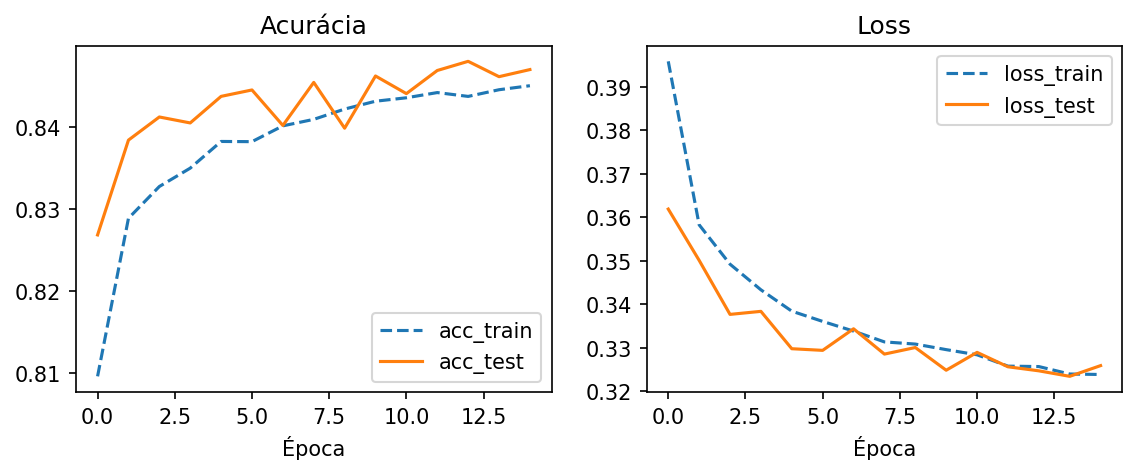

In [647]:
# Plota o gráfico das curvas de treinamento 
fig, ax = plt.subplots(1,2,figsize=(9,3), dpi=150)
ax[0].plot(hist.history['accuracy'], ls='--',label='acc_train')
ax[0].plot(hist.history['val_accuracy'], label='acc_test')
ax[1].plot(hist.history['loss'], ls='--',label='loss_train')
ax[1].plot(hist.history['val_loss'], label='loss_test')
ax[0].legend()
ax[1].legend()
ax[0].set(title='Acurácia',xlabel='Época')
ax[1].set(title='Loss',xlabel='Época')

Uma das vantagens imediatas do modelo de redes neurais é que a previsão pode ser entendida como uma propabilidade de cancelamento, algo que poderia ser exibido de maneira automática logo ao se realizar a reserva do hóspede e informar melhores decisões do atendente em relação ao cliente.

O gráfico em questão da rede treinada com 64 neuronios na camada inicial e 4 camadas mostra underfitting, que poderia ser melhorado com mais épocas de treinamento

In [570]:
# Escolhemos 10 entradas aleatórias do conjunto de teste
idx = np.random.randint(0,len(X_test),10)                             # Sorteia entradas aleatórias
prev = model.predict(X_test.iloc[idx]).flatten()                      # Faz a previsão nos dados sorteados
results = pd.DataFrame(data=(prev,y_test.iloc[idx])).transpose()      # Cria o dataframe de comparação
results.columns=['chance_canc','cancelamento']                        # Renomeia as colunas
results.chance_canc = results.chance_canc.map('{:.2%}'.format)        # Formata corretamente a coluna chance_canc
results.cancelamento = results.cancelamento.astype(int)
results

1/1 [==============================] - 0s 31ms/step


,chance_canc,cancelamento
0,28.44%,0
1,21.30%,0
2,11.86%,0
3,36.59%,1
4,62.60%,0
5,100.00%,1
6,37.46%,1
7,38.34%,0
8,0.42%,0
9,100.00%,1


## Conclusão:
### a) Os gráficos nos permitem chegar a algumas conclusões (não exaustivas) sobre a relação de variáveis com a probabilidade de cancelamentos:
* A chance de cancelamento aumenta quantos maior o número de dias entre a reserva e a hospedagem
* Hóspedes que já frequentaram o hotel tem cerca de 20% chance menor de cancelar a reserva
* Visando diminuir a porcentagem de cancelamentos, a rede de hotéis poderia realizar uma pré-reserva sem alocar quartos ou outros recursos para reservas com tempo até a chegada maior que um certo valor, por exemplo 60 ou 90 dias, exceto quando forem hóspedes que já se hospedaram antes, e realizar a reserva apenas a menos de 30 dias da hospedagem. 

### b) Os modelos preditivos aplicados tiveram sucesso em classificar com até 83% de acurácia os cancelamentos, mesmo partindo de modelos simples e datasets com classes desbalanceadas. O modelo baseado em redes neurais é capaz de facilmente estimar a probabilidade de cancelamento, informação que pode ser útil na lida com o cliente e procedimentos internos.

### c) A separação temporal do dataset não contribuiu significativamente para a acurácia dos modelos, esta seria apropriada caso houvesse forte dependência do número de cancelamentos em função do ano de reserva, o que vimos não ser verdade. Isso se verifica pelo fato de que a divisão aleatória do dataset tem a melhor acurácia, sendo o mais indicado.



